In [8]:
import PyOctaveBand
import numpy as np
import matplotlib.pyplot as plt
from acoustics.signal import third_octaves
from acoustics.standards.iec_61672_1_2013 import NOMINAL_THIRD_OCTAVE_CENTER_FREQUENCIES
from hos import HOS

In [32]:
# Sample rate and duration
fs = 1024*5
duration = 2  # In seconds
frq_limits = [12, 20000]

In [33]:
# Time array
x = np.arange(np.round(fs * duration)) / fs
len(x)

10240

In [34]:
def signal(x):
    # Signal with 6 frequencies
    f1, f2, f3, f4, f5, f6 = 20, 100, 500, 2000, 4000, 15000
    # Multi Sine wave signal
    return 100 \
        * (np.sin(2 * np.pi * f1 * x)
           + np.sin(2 * np.pi * f2 * x)
           + np.sin(2 * np.pi * f3 * x)
           + np.sin(2 * np.pi * f4 * x)
           + np.sin(2 * np.pi * f5 * x)
           + np.sin(2 * np.pi * f6 * x))

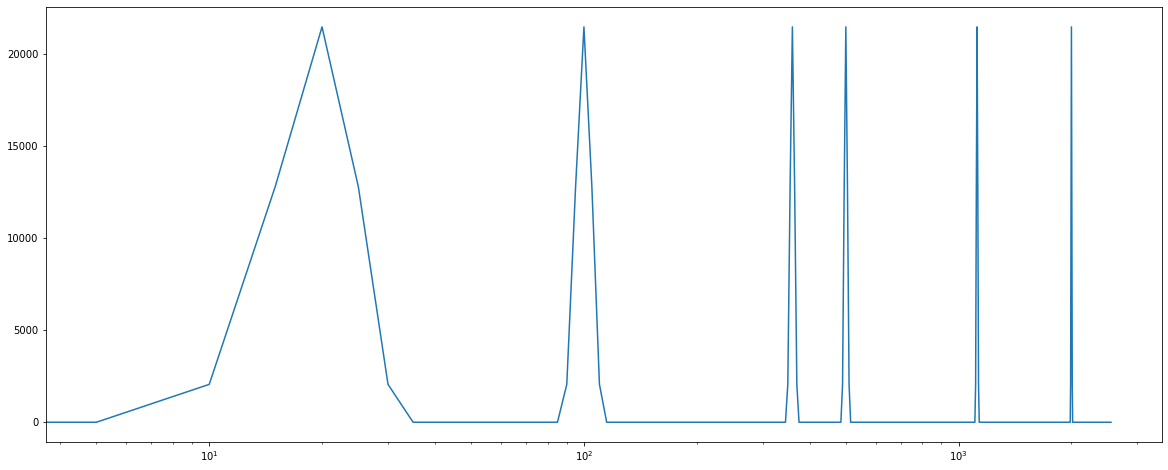

In [35]:
h = HOS(x,signal(x), window_size=1024)
a,b = h.spectrum(averages=100)

plt.figure(figsize=(20,8))
plt.plot(b[:len(b) // 2 - 1],a[:len(b) // 2 - 1])
plt.xscale('log')
plt.show()